# Averaging Interferometric Data

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.dates as mdates
import datetime
from smili import uvdata

## Averaging uvfits data
Here, we show how to time average uvfits data using a [VLBA data set of 3C 273 at 43 GHz](3C273DEC16.UVP) of [the Boston University Blazar Group](https://www.bu.edu/blazars/VLBAproject.html).

In [ ]:
uvfits = uvdata.UVFITS("./3C273DEC16.UVP")

### reevaluation of scatters in data

Prior to averaging, sometimes it may be useful to reevaluate errors on data to be used as weights for averaging.
You can recalculate errors by checking scatters of visibilities across time and/or frequency using weightcal method. solint is the width of the time bin in seconds, and dofreq is option to check scatters across channels and/or IFs. 

In [ ]:
#uvfits = uvfits.weightcal(solint=120, dofreq=1)

### frequecy averaging
Data can be frequency averaged by avspc method. You can switch if you average channels in each IF or all channels across IFs by dofreq.

In [ ]:
#uvfits = uvfits.avspc(dofreq)

### Time Averaging

SMILI's uvfits time averaging function will be done on scan basis. When you load data, all data are considered to be in a single scan. You can check this with get_scan method.

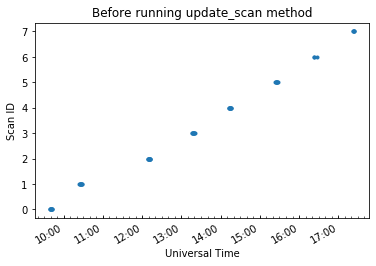

In [14]:
# Get combinations of utc and scan ID
utc, scans = uvfits.get_scan()

fig = plt.figure()
ax = plt.gca()
plt.title("Before running update_scan method")
plt.plot(utc, scans, ls="none", marker=".")

major_loc = mdates.HourLocator()
minor_loc = mdates.MinuteLocator(byminute=range(0,60,10))
major_fmt = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_major_formatter(major_fmt)
plt.tick_params(axis="x", which="both", direction="in")

plt.xlabel("Universal Time")
plt.ylabel("Scan ID")

fig.autofmt_xdate()

You can split data into several scans with update_scan method by giving the minimal interval between scans.

Text(0, 0.5, 'Scan ID')

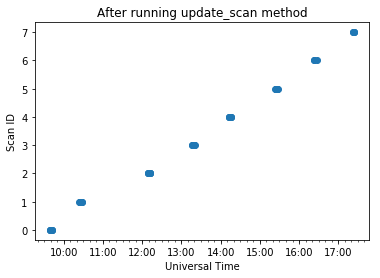

In [10]:
uvfits.update_scan(minint=360)

utc, scans = uvfits.get_scan()

plt.title("After running update_scan method")
plt.plot(utc, scans, ls="none", marker="o")

ax = plt.gca()
major_loc = mdates.HourLocator()
minor_loc = mdates.MinuteLocator(byminute=range(0,60,10))
major_fmt = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_major_formatter(major_fmt)

plt.xlabel("Universal Time")
plt.ylabel("Scan ID")

uvfits can be averaged by the uvavg method. You can specify the integeration time in seconds by solint. If solint=0, then uvfits will be scan averaged.

In [ ]:
uvfits_avg1 = uvfits.uvavg(solint=60)  # Average for 1min
uvfits_avg2 = uvfits.uvavg(solint=0)   # Scan average

Let's check averaged data.

In [ ]:
vtable_org = uvfits.select_stokes("I").make_vistable()
vtable_avg1 = uvfits_avg1.select_stokes("I").make_vistable()
vtable_avg2 = uvfits_avg2.select_stokes("I").make_vistable()

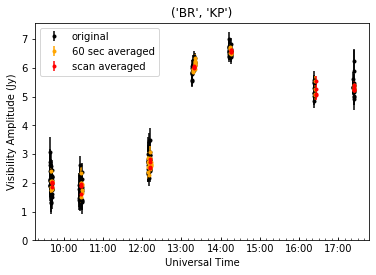

In [13]:
bls= vtable_org.baseline_list()

plt.title(bls[2])
params = dict(time_maj_fmt=major_fmt, time_maj_loc=major_loc, time_min_loc=minor_loc)
vtable_org.vplot(baseline=bls[0], label="original", color="black")
vtable_avg1.vplot(baseline=bls[0], label="60 sec averaged", color="orange")
vtable_avg2.vplot(baseline=bls[0], label="scan averaged", color="red")

ax = plt.gca()
major_loc = mdates.HourLocator()
minor_loc = mdates.MinuteLocator(byminute=range(0,60,10))
major_fmt = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_major_formatter(major_fmt)

plt.tick_params(axis="x", which="both", direction="in")
plt.legend()

## Acknowledgement
This notebook makes use of 43 GHz VLBA data from the VLBA-BU Blazar Monitoring Program (VLBA-BU-BLAZAR; 
http://www.bu.edu/blazars/VLBAproject.html), funded by NASA through the Fermi Guest Investigator Program. The VLBA is an instrument of the National Radio Astronomy Observatory. The National Radio Astronomy Observatory is a facility of the National Science Foundation operated by Associated Universities, Inc.